# Analysing Strategic Response of Traditional Banks using Real Options

Responding to the current situation there are four strategic options open to traditional banks:
1.	In-House development
2.	Acquisition
3.	Partnerships
4.	Innovation Hub

In a typical game-theory framework the other traditional banks will respond to the situation by either investing or deferring their investment to watch market dynamics. The decision to invest in option 1 to 4 will depend on the focus on turn-around time. Hence it is important to evaluate if competition is allowing sufficient time for implementing either of 1 to 4.

First applying game theory framework the ROA will be simulated using Montecarlo simulation.



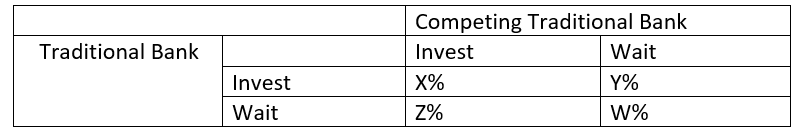

For each simulation the following lattice will have to be calculated with risk-neutral probability on each branch as follows:

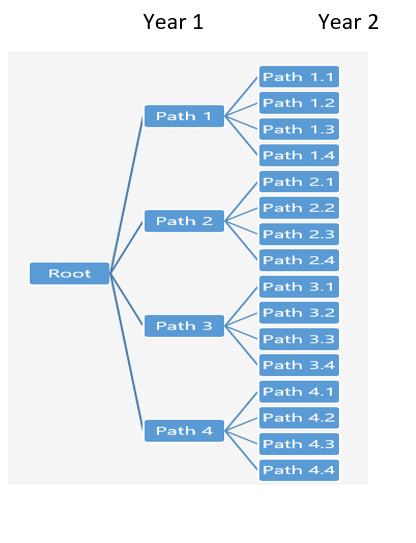

The First Step is to calculate the project payoffs after year 1 and year 2. As mentioned earlier there are four possible outcomes
1. The bank invests and competition bank also invests
2. The bank invests and competition bank defers
3. The bank defers and competition bank invests
4. The bank defers and competition bank also defers

We shall investigate the decision framework for 3 different IT projects. (a) Cybersecurity (b) Consumer Finance (c) High-Frequency Trading.

We are assuming the payoffs as follows:
1. Max(0,5% of the Project Cost)
2. Max(0,20% of the Project Cost)
3. Max(0,-20% of the project Cost)
4. Max(0, 2% of the Project Cost)

Now we shall estimate the project cost using Monte-Carlo framework as follows:

Each project is composed of 6 phases namely: Requirement Gathering, Design Specification, Construction, Testing, Implementation and Post Implementation.

1. Requirement Gathering: Min - 100000 Max - 200000 (Uniform Distribution)
2. Design Specification:  Min - 150000 Max - 150000 (Uniform Distribution)
3. Construction: Min - 750000 Max - 1200000 (Uniform Distribution)
4. Testing: Min - 48000 Max - 62000 (Uniform Distribution)
5. Implementation: Min - 200000 Max - 250000 (Uniform Distribution)
6. Post Implementation: Min - 50000 Max - 70000  (Uniform Distribution)

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from numpy import random as rn
from scipy.stats import norm, kurtosis, skew
%matplotlib inline

In [ ]:
data = pd.DataFrame(columns=['Requirement', 'Design', 'Construction', 'Testing', 'Implementation','PI'])
data['Requirement'] = [100000,200000]
data['Design'] = [100000,200000]
data['Construction'] = [750000,1200000]
data['Testing'] = [48000,62000]
data['Implementation'] = [200000,250000]
data['PI'] = [50000,70000]
data.rename(index={0:'Minimum',1:'Maximum'}, inplace=True)




In [ ]:
df = data
#df.rename_axis(“Activity”, inplace=True)
df['Total']=0
for i in range(0,df.shape[0]):
 df['Total'][i]=df.sum(axis=1)[i]
df.T


,Minimum,Maximum
Requirement,100000,200000
Design,100000,200000
Construction,750000,1200000
Testing,48000,62000
Implementation,200000,250000
PI,50000,70000
Total,1248000,1982000


The average cost of the project is (1248000+1982000)/2 = 1615000

In [ ]:
Avg = int(round(np.mean(df['Total']),0))
print("\033[1m The average total cost of the project is:", "${:,}".format(Avg))

 The average total cost of the project is: $1,615,000


In [ ]:
def stdevp(data):
  # Number of observations
  n = len(data)
  # Mean of the data
  mean = sum(data) / n
  # Square deviations
  deviations = [(x - mean) ** 2 for x in data]
  # Variance
  stdevp = (sum(deviations) / n)**0.5
  return stdevp
sigma = int(round(stdevp([df['Total'][0],df['Total'][1],Avg]),0))
print("\033[1m The upper bound of σ is:", "${:,}".format(sigma))

 The upper bound of σ is: $299,654


Number of simulations required for an error of less than 2%

In [ ]:
Loss = 0.02
error = int(round(Avg*Loss,0))
print("\033[1m The absolute error of 2% is:", "${:,}".format(error))

 The absolute error of 2% is: $32,300


Determine the number of simulation based on the below formula 

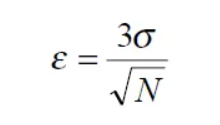

In [ ]:
N = int(round((3*sigma/error)**2,0))
print ("\033[1m The number of simulations to obtain a result with an error of less than 2% is:", N)

 The number of simulations to obtain a result with an error of less than 2% is: 775


In [ ]:
from numpy import random as rn
def rand():
 d = rn.uniform(0, 1, 1)[0]
 return (d)

In [ ]:
from numpy.random import seed
from numpy.random import rand
# seed random number generator
seed()
M = 775
# generate random numbers between 0-1
A_rand = rand(M)
B_rand = rand(M)
C_rand = rand(M)
D_rand = rand(M)
E_rand = rand(M)
F_rand = rand(M)

In [ ]:
A = 1*np.ones((M,1))
B = 1*np.ones((M,1))
C = 1*np.ones((M,1))
D = 1*np.ones((M,1))
E = 1*np.ones((M,1))
F = 1*np.ones((M,1))

In [ ]:
from pandas._libs.tslibs.offsets import BMonthBegin
Amax = df['Requirement'][0]
Amin = df['Requirement'][1]

Bmax = df['Design'][0]
Bmin = df['Design'][1]

Cmax = df['Construction'][0]
Cmin = df['Construction'][1]

Dmax = df['Testing'][0]
Dmin = df['Testing'][1]

Emax = df['Implementation'][0]
Emin = df['Implementation'][1]

Fmax = df['PI'][0]
Fmin = df['PI'][1]



In [ ]:
for i in range(0,M):
 A[i]=A_rand[i]*(Amax-Amin)+Amin
 B[i]=B_rand[i]*(Bmax-Bmin)+Bmin
 C[i]=C_rand[i]*(Cmax-Cmin)+Cmin
 D[i]=D_rand[i]*(Dmax-Dmin)+Dmin
 E[i]=E_rand[i]*(Emax-Emin)+Emin
 F[i]=F_rand[i]*(Fmax-Amin)+Fmin

In [ ]:
Total = 1*np.ones((M,1))

In [ ]:
for i in range(0,M):
 Total[i]=A[i]+B[i]+C[i]+D[i]+E[i]+F[i]


In [ ]:
Expected_Value1 = int(np.mean(Total))
print("\033[1m The expected value of the total cost of the project is:", "${:,}".format(Expected_Value1))

 The expected value of the total cost of the project is: $1,549,271


In [ ]:
Median1 = int(np.median(Total))
print("\033[1m The median of the total cost of the project is:", "${:,}".format(Median1))

 The median of the total cost of the project is: $1,551,030


In [ ]:
sigma1 = int(stdevp(Total))
print("\033[1m The standard deviation of the total cost of the project is:", "${:,}".format(sigma1))

 The standard deviation of the total cost of the project is: $142,762


Sigma = 142,762/1556069 = 9.17%

Revisiting the Payoff Matrix:

1. Max(0,5% of the 1,556,069) = 77,803
2. Max(0,20% of the 1,556,069) = 311,213
3. Max(0,-20% of the 1,556,069) = 0
4. Max(0, 2% of the 1,556,069) = 31,121

Now we have to calculate the option price using the quadrinormal tree structure as mentioned above. But we can simplify the quadrinormal structure to trinormal structure if we consider the probablility of one party defers and the other party invests to be the same.

Therefore 

p(u) = Bank A and Bank B both invests
p(m) = Bank A invests and Bank B defers or viceversa
p(d) = Bank A and Bank B both defers

The trinomial tree is a lattice-based computational model used in financial mathematics to price options. It was developed by Phelim Boyle in 1986. It is an extension of the binomial options pricing model, and is conceptually similar.

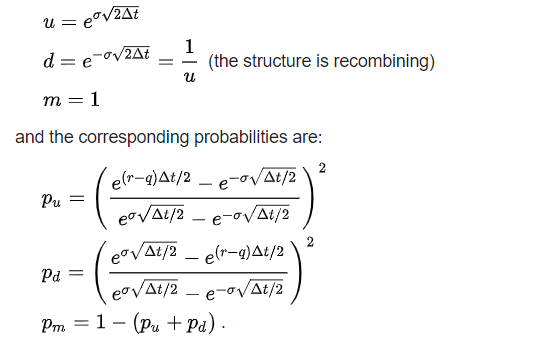

In [ ]:
import math

In [ ]:
#Risk Free Rate and Dividend are 4% and 0% respectively
r = 0.04
q = 0
b = r-q

#Period is 2 period structure for the time being
dt = 1/2
# volatility
v = 0.09147

In [ ]:
pu = pow((math.exp(0.5*b*dt) - math.exp(-v*math.sqrt(0.5*dt))) / (math.exp(v*math.sqrt(0.5*dt)) - math.exp(-v*math.sqrt(0.5*dt))), 2);
pd = pow((math.exp(v*math.sqrt(0.5*dt)) - math.exp(0.5*b*dt))  / (math.exp(v*math.sqrt(0.5*dt)) - math.exp(-v*math.sqrt(0.5*dt))), 2);
pm = 1.0 - pu - pd;

In [ ]:
print("Probability that bank invests and comeptition also invests:", "{0:.2f}".format(pu))
print("Probability that bank invests and comeptition doesnot:", "{0:.2f}".format(pm/2))
print("Probability that bank invests and comeptition doesnot:", "{0:.2f}".format(pm/2))
print("Probability that bank waits and comeptition also waits:", "{0:.2f}".format(pd))

Probability that bank invests and comeptition also invests: 0.36
Probability that bank invests and comeptition doesnot: 0.24
Probability that bank invests and comeptition doesnot: 0.24
Probability that bank waits and comeptition also waits: 0.16


Year 1 Option price for the Bank is as follows

In [ ]:
(77803*0.36 + 311213*0.24 + 0*0.24 + 31121*0.16)/1.04

103538.03846153845

Therefore for year 1 any project with value 104K is NPV positive and worths a "Go Ahead"

For Year 2 there are 4 paths:

Path 1: Both Party has initially invested now the decision before them is whether they should invest more or they should wait.

Path 2: Our bank invested but competition did not now the decision before them is whether they should invest more or they should wait.

Path 3: Our bank waited but competition invested now the decision before them is whether they should invest more or they should wait.

Path 4: No one invested hence the decision before them is whether they should invest more or they should wait

The payoffs in the year 2 for Path 1, Path 2, Path 3 and Path 4 will be different because of two reasons:

1. The project size will change as it may require a bigger investment.
2. Banks that did not invest may have to invest more to catch up based on market dynamics.

We shall build more from this point onwards

References:

1. Monte Carlo Simulation in Python; Estimate the Total Cost of a Project blog by Roy Polanitzer

2. Wikipedia page on trinomial option.